$\textbf{Finit element method : Pressure field propagation}$

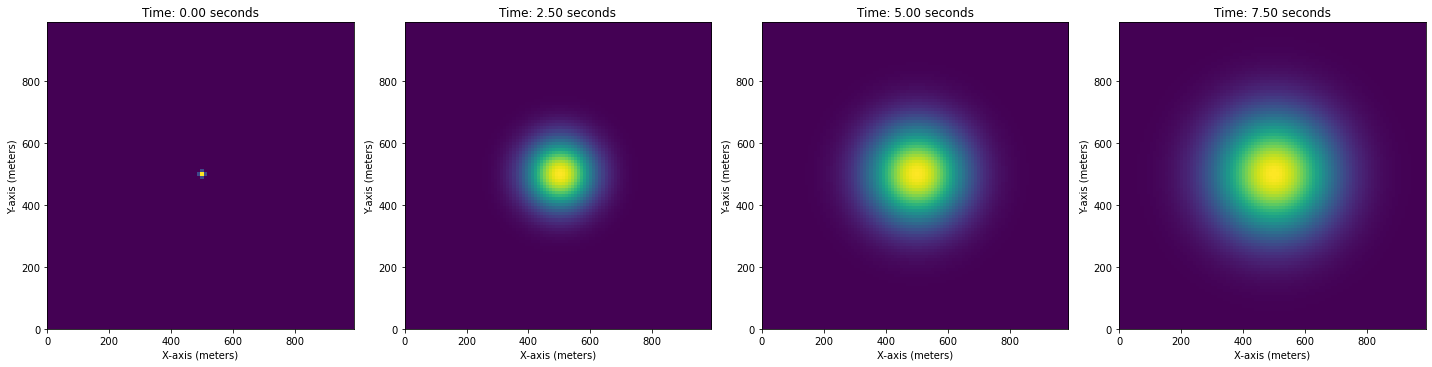

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define simulation parameters
c = 343         # Speed of sound in air (m/s)
dx = 10         # Spatial grid spacing (meters)
dt = 0.01       # Temporal grid spacing (seconds)
duration = 10   # Simulation duration (seconds)
source_position = (50, 50)  # Source position in grid coordinates

# Set up the spatial grid
grid_size_x = 100
grid_size_y = 100
x = np.linspace(0, (grid_size_x - 1) * dx, grid_size_x)
y = np.linspace(0, (grid_size_y - 1) * dx, grid_size_y)
X, Y = np.meshgrid(x, y)

# Set initial conditions with a pressure disturbance at the source position
pressure = np.zeros((grid_size_x, grid_size_y))
pressure[source_position] = 1

# Create subplots for visualization
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Simulation loop
num_steps = int(duration / dt)
for step in range(num_steps):
    # Compute the Laplacian using finite differences
    laplacian = (np.roll(pressure, 1, axis=0) + np.roll(pressure, -1, axis=0)
                 + np.roll(pressure, 1, axis=1) + np.roll(pressure, -1, axis=1) - 4 * pressure) / dx**2
    
    # Update pressure using the wave equation
    pressure_new = 2 * pressure - pressure + (c * dt)**2 * laplacian
    
    # Update pressure for the next time step
    pressure = pressure_new

    # Plot the pressure field at specified intervals during the simulation
    if step % (num_steps // 4) == 0:
        axs[step // (num_steps // 4)].imshow(pressure, extent=(0, x[-1], 0, y[-1]), origin='lower', cmap='viridis')
        axs[step // (num_steps // 4)].set_title(f'Time: {step * dt:.2f} seconds')
        axs[step // (num_steps // 4)].set_xlabel('X-axis (meters)')
        axs[step // (num_steps // 4)].set_ylabel('Y-axis (meters)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
